# Fake News Pair Classification

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

## Step 1: Load Data

## 1.1 Load training data

In [2]:
df_train = pd.read_csv("./data/train.csv")
df_test = pd.read_csv("./data/test.csv")

In [3]:
df_train.head()

,id,tid1,tid2,title1_zh,title2_zh,title1_en,title2_en,label
0,0,0,1,2017养老保险又新增两项，农村老人人人可申领，你领到了吗,警方辟谣“鸟巢大会每人领5万” 仍有老人坚持进京,There are two new old-age insurance benefits f...,"Police disprove ""bird's nest congress each per...",unrelated
1,3,2,3,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",深圳GDP首超香港？深圳统计局辟谣：只是差距在缩小,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outstrips Hong Kong? Shenzhen S...,unrelated
2,1,2,4,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",GDP首超香港？深圳澄清：还差一点点……,"""If you do not come to Shenzhen, sooner or lat...",The GDP overtopped Hong Kong? Shenzhen clarifi...,unrelated
3,2,2,5,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",去年深圳GDP首超香港？深圳统计局辟谣：还差611亿,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP topped Hong Kong last year? She...,unrelated
4,9,6,7,"""用大蒜鉴别地沟油的方法,怎么鉴别地沟油",吃了30年食用油才知道，一片大蒜轻松鉴别地沟油,"""How to discriminate oil from gutter oil by me...",It took 30 years of cooking oil to know that o...,agreed


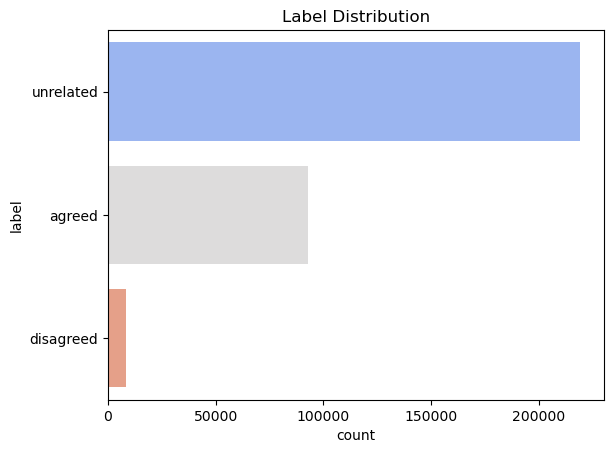

In [4]:
sns.countplot(y="label", palette="coolwarm", data=df_train).set_title('Label Distribution')
plt.show()

In [5]:
Counter(df_train.label)

Counter({'unrelated': 219313, 'agreed': 92973, 'disagreed': 8266})

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320552 entries, 0 to 320551
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         320552 non-null  int64 
 1   tid1       320552 non-null  int64 
 2   tid2       320552 non-null  int64 
 3   title1_zh  320552 non-null  object
 4   title2_zh  320545 non-null  object
 5   title1_en  320552 non-null  object
 6   title2_en  320552 non-null  object
 7   label      320552 non-null  object
dtypes: int64(3), object(5)
memory usage: 19.6+ MB


## 1.2 Data Cleaning: Remove blank headers

In [7]:
empty_title = ((df_train['title2_zh'].isnull()) \
               | (df_train['title1_zh'].isnull()) \
               | (df_train['title2_zh'] == '') \
               | (df_train['title2_zh'] == '0'))
df_train = df_train[~empty_title]

## 1.3 Data Cleaning: Remove samples with long sequences

### Avoid being unable to fit the entire gpu memory

In [8]:
MAX_LENGTH = 30
df_train = df_train[~(df_train.title1_zh.apply(lambda x : len(x)) > MAX_LENGTH)]
df_train = df_train[~(df_train.title2_zh.apply(lambda x : len(x)) > MAX_LENGTH)]

Lamda Function (匿名函式):

不需要定義函式名稱的一種函式

它的功能就像是使用def的方式一樣，只是寫法上更為簡潔，可以寫在行內，在使用前不需要先把函式綁定在一個特定的名稱上。

(lamda parameter: expression)(argument)

https://medium.com/seaniap/python-lambda-%E5%87%BD%E5%BC%8F-7e86a56f1996

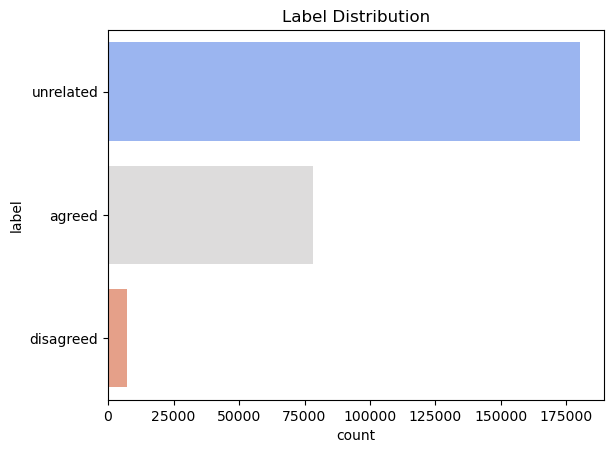

In [9]:
sns.countplot(y="label", palette="coolwarm", data=df_train).set_title('Label Distribution')
plt.show()

In [10]:
Counter(df_train.label)

Counter({'unrelated': 180319, 'agreed': 78280, 'disagreed': 7094})

## 1.4 Test with 1% training data
### How much does BERT help with a small amount of labeled data

In [11]:
SAMPLE_FRAC = 0.05
df_train = df_train.sample(frac=SAMPLE_FRAC, random_state=1234)

## 1.5 Remove unnecessary data
### Remove unnecessary column & rename column name for both header

In [12]:
df_train.head()

,id,tid1,tid2,title1_zh,title2_zh,title1_en,title2_en,label
56857,56993,49386,49353,中国股市最大的“泡沫”破灭，2018年或将是牛市的终结者！,中国股市突发史诗级利空，虚假牛市必破灭：中国石化 中环股份,"China's biggest ""bubble"" burst, 2018 may be th...",China's stock market suddenly burst into the s...,unrelated
173419,173800,78294,92214,开撕！唐嫣转发“内涵”杨幂的微博，圈内闺蜜撕逼堪称“宫斗戏”,唐嫣工作室插刀杨幂被盗号 揭中国好闺蜜关系现状,"Tear up! Tang Yin posted ""intension"" Yang's mi...",the present situation of the relationship betw...,agreed
113017,113319,81956,81948,又一波华为mate10手机壳来了，尤其是第三款，人人都抢着要,华为mate10、荣耀note9曝光，华为的三旗舰产品来了,"Another wave of huawei's 10-mobile phone case,...","Huawei's 10-year-old mate10, the glory of note...",unrelated
233270,233758,139924,18847,梧州卖菜大妈与两穿特勤制服男子起冲突，脸部被狠踹,8月1日过后，没考驾照的要哭了，驾校也只能跟你说三个对不起了,Wuzhou food maid confronts two men wearing spe...,"After 1 August, if you don't get your driver's...",unrelated
228215,228685,137906,137951,杨幂现身下巴惹争议 惊变方块脸一朝回到整容前,高血压的头号天敌，每天喝一杯，血栓血脂全溶光，家有高血压快存,"Yang Moe shows off chin, causes controversy, f...","The top predator of high blood pressure, drink...",unrelated


In [13]:
df_train = df_train.reset_index()

In [14]:
df_train.head()

,index,id,tid1,tid2,title1_zh,title2_zh,title1_en,title2_en,label
0,56857,56993,49386,49353,中国股市最大的“泡沫”破灭，2018年或将是牛市的终结者！,中国股市突发史诗级利空，虚假牛市必破灭：中国石化 中环股份,"China's biggest ""bubble"" burst, 2018 may be th...",China's stock market suddenly burst into the s...,unrelated
1,173419,173800,78294,92214,开撕！唐嫣转发“内涵”杨幂的微博，圈内闺蜜撕逼堪称“宫斗戏”,唐嫣工作室插刀杨幂被盗号 揭中国好闺蜜关系现状,"Tear up! Tang Yin posted ""intension"" Yang's mi...",the present situation of the relationship betw...,agreed
2,113017,113319,81956,81948,又一波华为mate10手机壳来了，尤其是第三款，人人都抢着要,华为mate10、荣耀note9曝光，华为的三旗舰产品来了,"Another wave of huawei's 10-mobile phone case,...","Huawei's 10-year-old mate10, the glory of note...",unrelated
3,233270,233758,139924,18847,梧州卖菜大妈与两穿特勤制服男子起冲突，脸部被狠踹,8月1日过后，没考驾照的要哭了，驾校也只能跟你说三个对不起了,Wuzhou food maid confronts two men wearing spe...,"After 1 August, if you don't get your driver's...",unrelated
4,228215,228685,137906,137951,杨幂现身下巴惹争议 惊变方块脸一朝回到整容前,高血压的头号天敌，每天喝一杯，血栓血脂全溶光，家有高血压快存,"Yang Moe shows off chin, causes controversy, f...","The top predator of high blood pressure, drink...",unrelated


In [15]:
df_train = df_train.loc[:, ['title1_zh', 'title2_zh', 'label']]
df_test = df_test.loc[:, ["title1_zh", "title2_zh", "id"]]

In [16]:
df_train.head()

,title1_zh,title2_zh,label
0,中国股市最大的“泡沫”破灭，2018年或将是牛市的终结者！,中国股市突发史诗级利空，虚假牛市必破灭：中国石化 中环股份,unrelated
1,开撕！唐嫣转发“内涵”杨幂的微博，圈内闺蜜撕逼堪称“宫斗戏”,唐嫣工作室插刀杨幂被盗号 揭中国好闺蜜关系现状,agreed
2,又一波华为mate10手机壳来了，尤其是第三款，人人都抢着要,华为mate10、荣耀note9曝光，华为的三旗舰产品来了,unrelated
3,梧州卖菜大妈与两穿特勤制服男子起冲突，脸部被狠踹,8月1日过后，没考驾照的要哭了，驾校也只能跟你说三个对不起了,unrelated
4,杨幂现身下巴惹争议 惊变方块脸一朝回到整容前,高血压的头号天敌，每天喝一杯，血栓血脂全溶光，家有高血压快存,unrelated


In [17]:
df_train.columns = ['text_a', 'text_b', 'label']
df_test.columns = ["text_a", "text_b", "Id"]

In [18]:
df_train.head()

,text_a,text_b,label
0,中国股市最大的“泡沫”破灭，2018年或将是牛市的终结者！,中国股市突发史诗级利空，虚假牛市必破灭：中国石化 中环股份,unrelated
1,开撕！唐嫣转发“内涵”杨幂的微博，圈内闺蜜撕逼堪称“宫斗戏”,唐嫣工作室插刀杨幂被盗号 揭中国好闺蜜关系现状,agreed
2,又一波华为mate10手机壳来了，尤其是第三款，人人都抢着要,华为mate10、荣耀note9曝光，华为的三旗舰产品来了,unrelated
3,梧州卖菜大妈与两穿特勤制服男子起冲突，脸部被狠踹,8月1日过后，没考驾照的要哭了，驾校也只能跟你说三个对不起了,unrelated
4,杨幂现身下巴惹争议 惊变方块脸一朝回到整容前,高血压的头号天敌，每天喝一杯，血栓血脂全溶光，家有高血压快存,unrelated


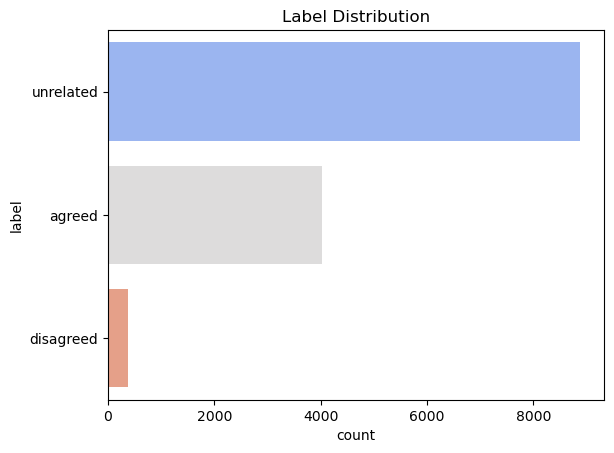

In [19]:
sns.countplot(y="label", palette="coolwarm", data=df_train).set_title('Label Distribution')
plt.show()

In [20]:
Counter(df_train.label)

Counter({'unrelated': 8885, 'agreed': 4027, 'disagreed': 373})

# Train validation split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
print(len(df_train))

13285


In [23]:
VALIDATION_RATIO = 0.2
RANDOM_STATE = 9527

df_train, df_val = train_test_split(df_train, test_size=VALIDATION_RATIO, random_state=RANDOM_STATE)

In [24]:
len(df_train)

10628

In [25]:
len(df_val)

2657

## 1.6 Save dataframe
### Save processing results as tsb for PyTorch

In [26]:
df_train.to_csv("train.tsv", sep="\t", index=False)
df_val.to_csv("val.tsv", sep="\t", index=False)
df_test.to_csv("test.tsv", sep="\t", index=False)

In [27]:
print("Number of training samples: ", len(df_train))
print("Number of validation samples: ", len(df_val))
print("Number of testing samples: ", len(df_test))

Number of training samples:  10628
Number of validation samples:  2657
Number of testing samples:  80126


In [28]:
df_train.head()

,text_a,text_b,label
4714,"王诗龄嫌姚明女儿衣着朴素喊其“农村娃”, 李湘的回复惹怒网友",王诗龄叫姚明女儿“农村娃”，妈妈李湘的回应让我大跌眼镜！,agreed
7254,网友偶遇王思聪与新女友约会，全程贴心照顾男友力十足,马蓉毫无顾忌海口约会？新男友提行李,unrelated
12216,孩子颜值高不高，看孩子爸爸就知道了，这几个标配都有了吗,孩子智商高不高？还得看在一岁左右有没有这4种表现,unrelated
2356,刘诗诗为了减肥曾经5年不吃主食，明星减肥这么可怕吗？,不吃主食，真的能“减肥”吗？很多人不懂，难怪“长胖”了,unrelated
5790,历经两度失败婚姻，再与小13岁老公结婚，这次会幸福？,13岁少年与挺肚子新娘结婚 网友：单身狗伤不起,unrelated


In [29]:
df_val.head()

,text_a,text_b,label
1876,以您的名字做手机壁纸 本期送上绿色护眼清新自然壁纸,健康：转眼睛、看绿色不护眼！真正对眼睛好应该这样做,unrelated
277,万达出事，城市安全要堵住每一个细节漏洞,银川金凤万达地下车库着火了？谣言，别信！,unrelated
9878,男游客在东太行景区玻璃栈道行走中滑倒，玻璃突现破碎,出事了！太行山玻璃栈道的玻璃“碎”了 过路人被吓趴,agreed
7722,决明子+它减肥，三天治便秘，7天肚子瘦一圈,吓得我筷子都掉了，橄榄油能致癌？,unrelated
10450,李晨和张馨予分手真正原因被曝光，网友调侃称：范冰冰会作何感想,卓伟又爆料：范冰冰李晨已分手,unrelated


In [30]:
df_test.head()

,text_a,text_b,Id
0,萨拉赫人气爆棚!埃及总统大选未参选获百万选票 现任总统压力山大,辟谣！里昂官方否认费基尔加盟利物浦，难道是价格没谈拢？,321187
1,萨达姆被捕后告诫美国的一句话，发人深思,10大最让美国人相信的荒诞谣言，如蜥蜴人掌控着美国,321190
2,萨达姆此项计划没有此国破坏的话，美国还会对伊拉克发动战争吗,萨达姆被捕后告诫美国的一句话，发人深思,321189
3,萨达姆被捕后告诫美国的一句话，发人深思,被绞刑处死的萨达姆是替身？他的此男人举动击破替身谣言！,321193
4,萨达姆被捕后告诫美国的一句话，发人深思,中国川贝枇杷膏在美国受到热捧？纯属谣言！,321191


## 1.7 Model baseline

In [31]:
df_train.label.value_counts() / len(df_train)

unrelated    0.666353
agreed       0.305514
disagreed    0.028133
Name: label, dtype: float64

## 1.8 Testing samples / Training samples

In [32]:
ratio = len(df_test) / len(df_train)
print("Testing samples / Training samples= {:.1f} ".format(ratio))

Testing samples / Training samples= 7.5 


# Step 2: Convert raw text to BERT compatible input format

### My dog is cute. He likes playing.

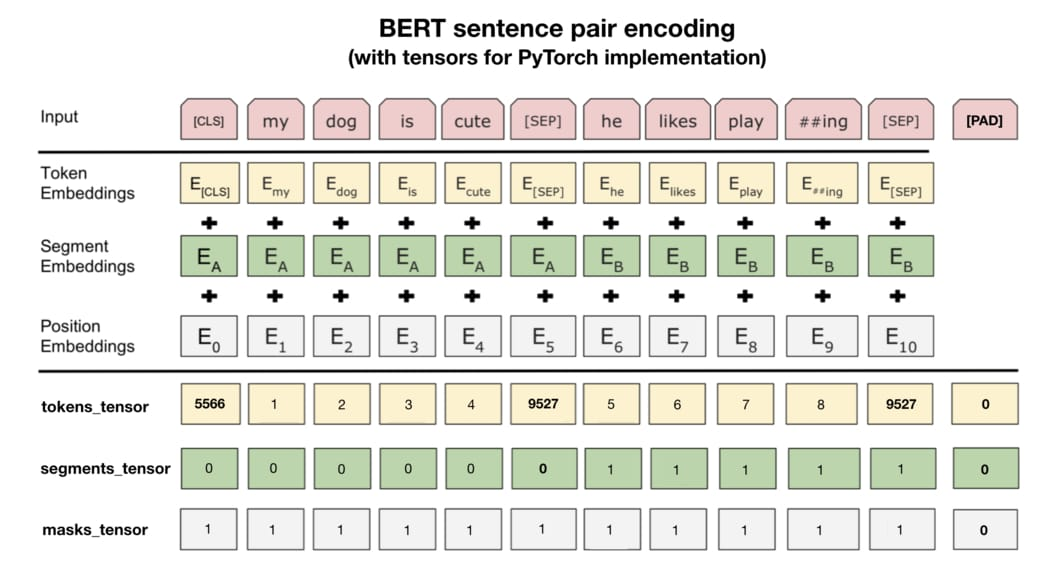

[CLS] 用於每個序列之首，Fine-tuning時用於聚集所有分類資訊，代表整個序列的語意

[SEP] 在兩個句子之間插入這個token作為區隔

[PAD] 將長度不一的輸入序列補齊，方便進行batch運算

[UNK] 沒出現在BERT字典裡的字會被這個TOKEN取代

[MASK]未知遮罩，僅在預訓練階段的扣漏字任務中會用到


https://ithelp.ithome.com.tw/articles/10260396

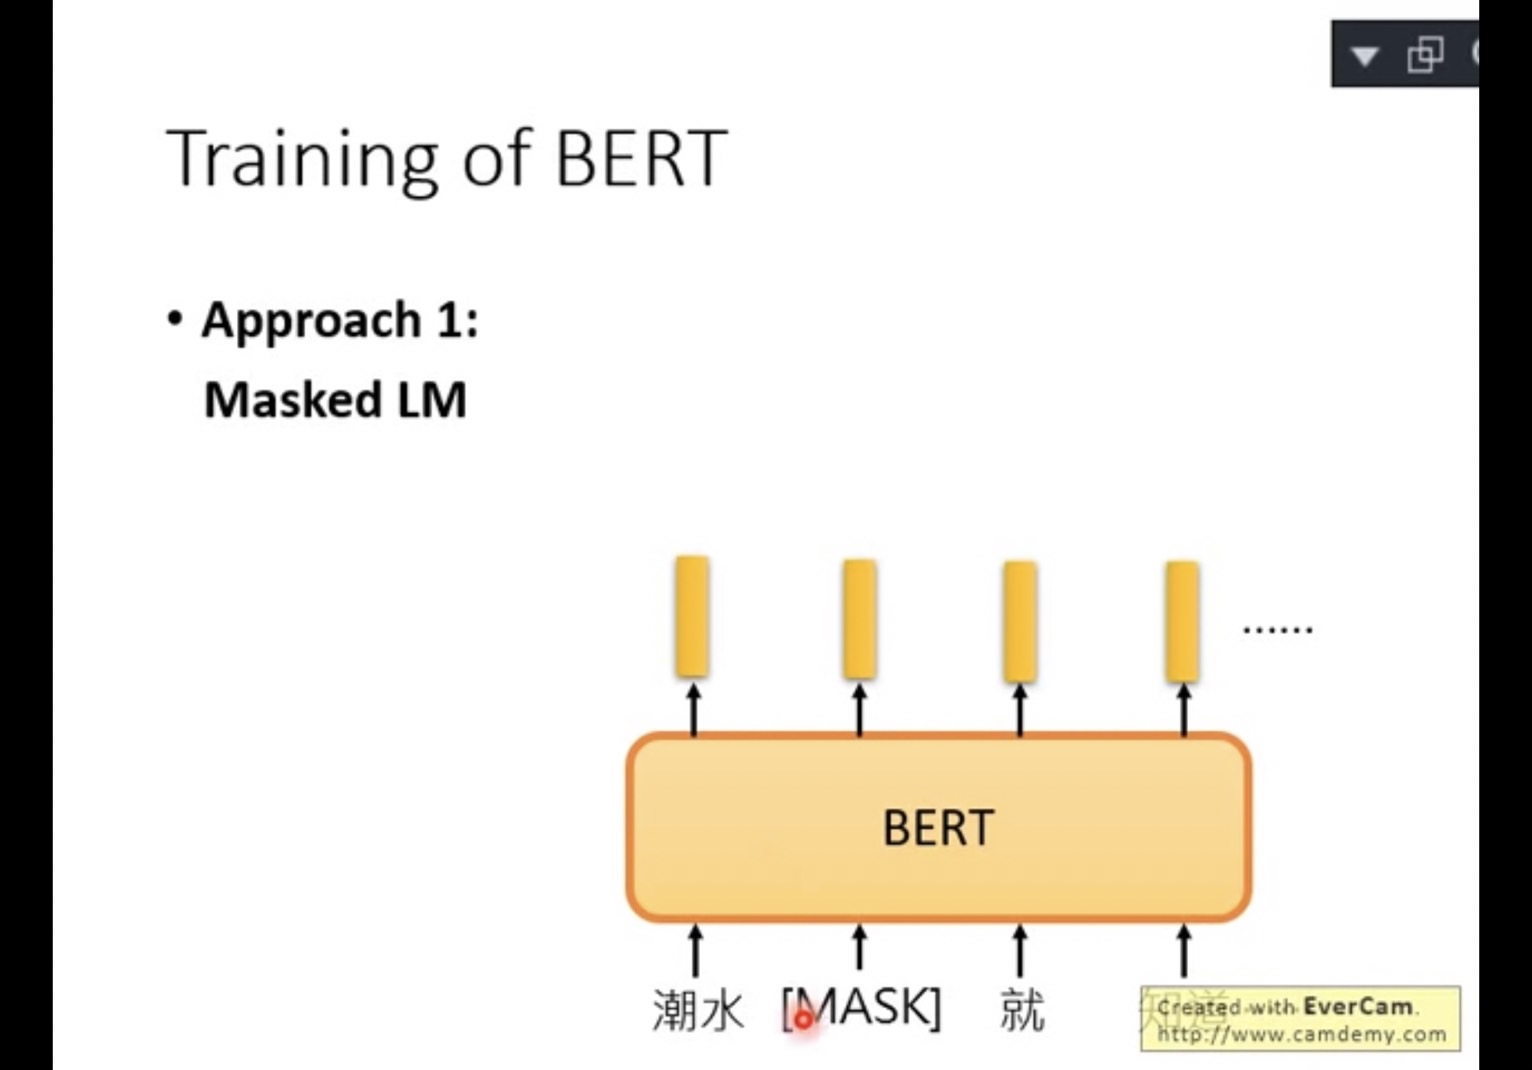

Masked LM: 把所有的句子，隨機將15%的詞彙置換成一個特殊的token，這個token叫做mask(克漏字問題）

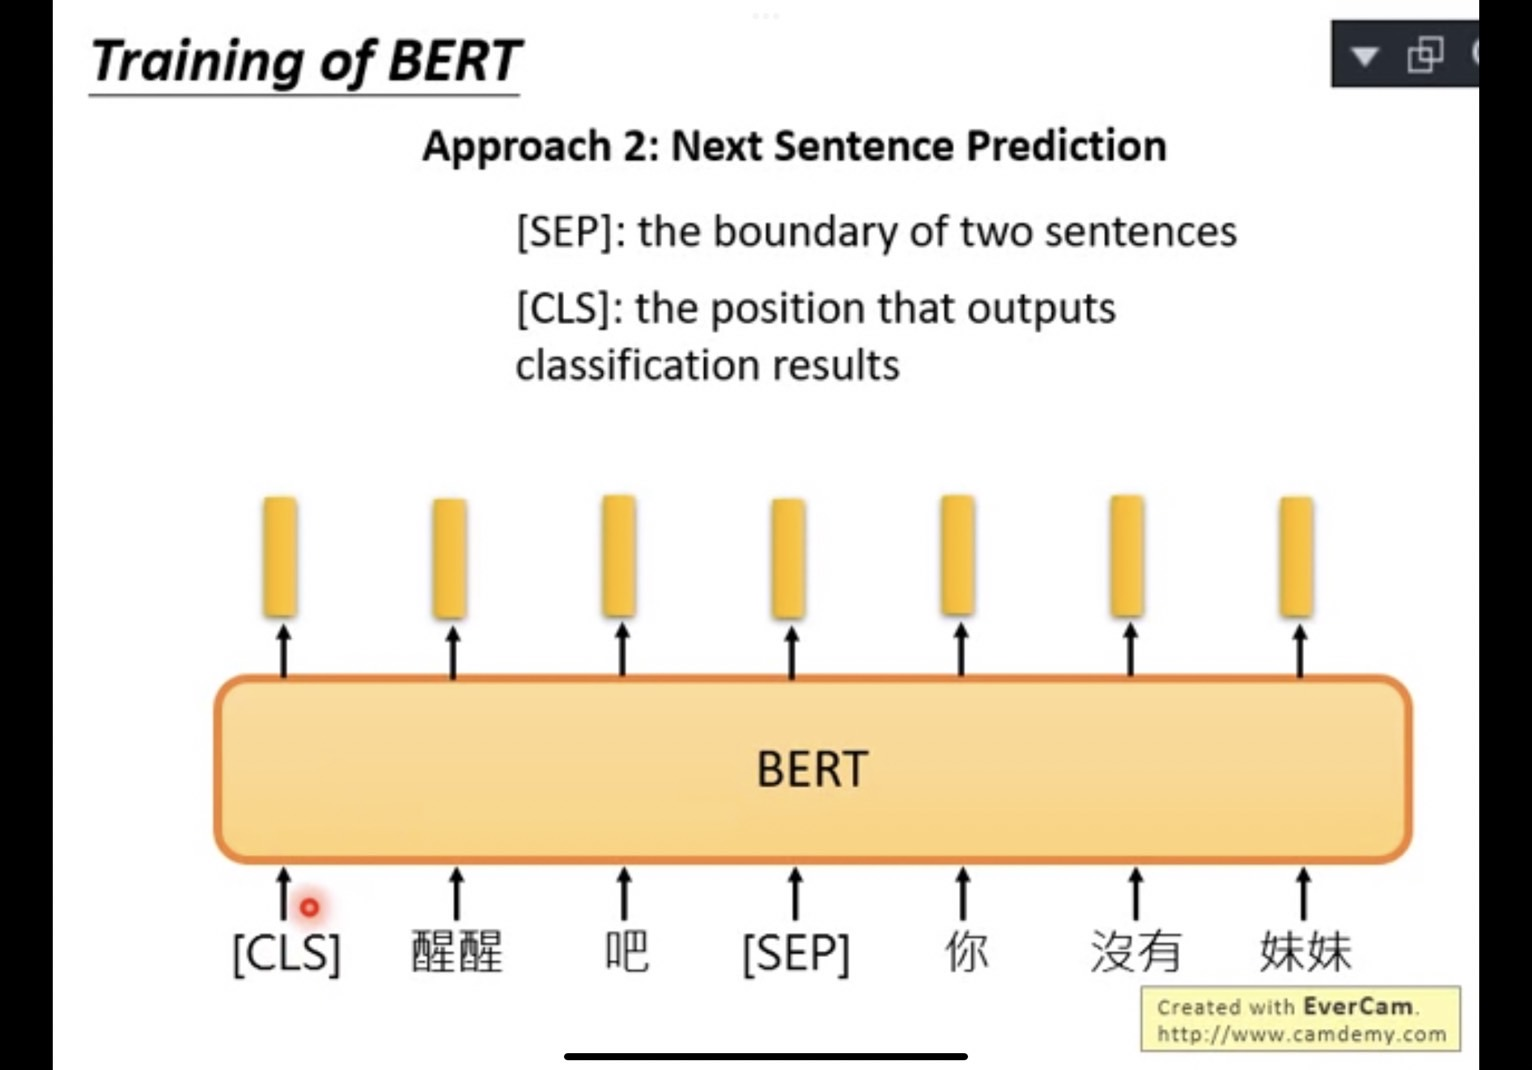

Next Sentence Prediction: 給兩個句子，BERT去預測這兩個句子是接在一起的，還是不是接在一起的

In [33]:
import torch
from torch.utils.data import Dataset
from transformers import BertTokenizer
from IPython.display import clear_output

## 2.1 Get the tokenizer used by this pretrained model

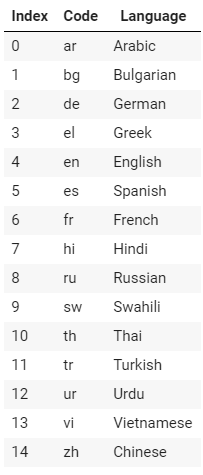

In [34]:
# https://huggingface.co/models

In [35]:
PRETRAINED_MODEL_NAME = "bert-base-chinese"

In [36]:
tokenizer = BertTokenizer.from_pretrained(PRETRAINED_MODEL_NAME)

In [37]:
clear_output()
print("PyTorch Version：", torch.__version__)

PyTorch Version： 1.12.1


## 2.2 Implement a Dataset that can be used to read train/test sets

這個 Dataset 每次將 tsv 裡的一筆成對句子轉換成 BERT 相容的格式，並回傳 3 個 tensors

- tokens_tensor: 兩個句子合併後的索引序列，包含 [CLS] 與 [SEP]

- segments_tensor：用來識別界限。第一句為0，第二句為1。句子之間的[SEP]為0

- label_tensor：將分類標籤轉換成類別索引的 tensor, 如果是測試集則回傳 None

- mask_tensor: 用來界定自注意力機制範圍。1 讓 BERT 關注該位置，0 則代表是 padding 不需關注

In [38]:
class FakeNewsDataset(Dataset):
    # Read the pre-processed tsv file & initialize some parameters
    def __init__(self, mode, tokenizer):
        assert mode in ["train","val","test"]  
        self.mode = mode
        
        self.df = pd.read_csv(mode + ".tsv", sep="\t").fillna("")
        self.len = len(self.df)
        self.label_map = {'agreed': 0, 'disagreed': 1, 'unrelated': 2}
        self.tokenizer = tokenizer  # BERT tokenizer
    
    # Define a function that returns a training/test data
    def __getitem__(self, idx):
        if self.mode == "test":
            text_a, text_b = self.df.iloc[idx, :2].values
            label_tensor = None
        else:
            text_a, text_b, label = self.df.iloc[idx, :].values
            
            ### label_tensor ###
            # label text to idx (tensor)
            label_id = self.label_map[label]
            label_tensor = torch.tensor(label_id)
            
        # Create BERT tokens for the first sentence and add delimiters [SEP]
        word_pieces = ["[CLS]"]
        
        tokens_a = self.tokenizer.tokenize(text_a)
        # ex: 
        # "機器學習，好好玩!" ->
        # ['機',
        #  '器',
        #  '學',
        #  '習',
        #  '，',
        #  '好',
        #  '好',
        #  '玩',
        #  '!']
        
        word_pieces += tokens_a + ["[SEP]"]
        # ex: 
        # "機器學習，好好玩!" ->
        # ['[CLS]',
        #  '機',
        #  '器',
        #  '學',
        #  '習',
        #  '，',
        #  '好',
        #  '好',
        #  '玩',
        #  '!',
        #  '[SEP]']
        
        len_a = len(word_pieces)
        
        
        # BERT tokens for the second sentence
        tokens_b = self.tokenizer.tokenize(text_b)
        word_pieces += tokens_b + ["[SEP]"]
        len_b = len(word_pieces) - len_a
        
        
        ### tokens_tensor ###
        # Convert the entire token sequence to an index sequence
        ids = self.tokenizer.convert_tokens_to_ids(word_pieces)
        tokens_tensor = torch.tensor(ids)
        
        ### segments_tensor ###
        # 將第一句包含 [SEP] 的 token 位置設為 0，其他為 1 表示第二句
        segments_tensor = torch.tensor([0] * len_a + [1] * len_b, 
                                        dtype=torch.long) # torch.int64
        
        return (tokens_tensor, segments_tensor, label_tensor)
    
    def __len__(self):
        return self.len
    
    
# 初始化一個專門讀取訓練樣本的 Dataset，使用中文 BERT 斷詞
trainset = FakeNewsDataset("train", tokenizer=tokenizer)

valset = FakeNewsDataset("val", tokenizer=tokenizer)

In [39]:
train_df = pd.read_csv("train" + ".tsv", sep="\t").fillna("")
train_df.head()

,text_a,text_b,label
0,"王诗龄嫌姚明女儿衣着朴素喊其“农村娃”, 李湘的回复惹怒网友",王诗龄叫姚明女儿“农村娃”，妈妈李湘的回应让我大跌眼镜！,agreed
1,网友偶遇王思聪与新女友约会，全程贴心照顾男友力十足,马蓉毫无顾忌海口约会？新男友提行李,unrelated
2,孩子颜值高不高，看孩子爸爸就知道了，这几个标配都有了吗,孩子智商高不高？还得看在一岁左右有没有这4种表现,unrelated
3,刘诗诗为了减肥曾经5年不吃主食，明星减肥这么可怕吗？,不吃主食，真的能“减肥”吗？很多人不懂，难怪“长胖”了,unrelated
4,历经两度失败婚姻，再与小13岁老公结婚，这次会幸福？,13岁少年与挺肚子新娘结婚 网友：单身狗伤不起,unrelated


In [40]:
val_df = pd.read_csv("val" + ".tsv", sep="\t").fillna("")
val_df.head()

,text_a,text_b,label
0,以您的名字做手机壁纸 本期送上绿色护眼清新自然壁纸,健康：转眼睛、看绿色不护眼！真正对眼睛好应该这样做,unrelated
1,万达出事，城市安全要堵住每一个细节漏洞,银川金凤万达地下车库着火了？谣言，别信！,unrelated
2,男游客在东太行景区玻璃栈道行走中滑倒，玻璃突现破碎,出事了！太行山玻璃栈道的玻璃“碎”了 过路人被吓趴,agreed
3,决明子+它减肥，三天治便秘，7天肚子瘦一圈,吓得我筷子都掉了，橄榄油能致癌？,unrelated
4,李晨和张馨予分手真正原因被曝光，网友调侃称：范冰冰会作何感想,卓伟又爆料：范冰冰李晨已分手,unrelated


In [41]:
trainset[0] 

(tensor([ 101, 4374, 6408, 7977, 2066, 2001, 3209, 1957, 1036, 6132, 4708, 3320,
         5162, 1591, 1071,  100, 1093, 3333, 2015,  100,  117, 3330, 3960, 4638,
         1726, 1908, 2685, 2584, 5381, 1351,  102, 4374, 6408, 7977, 1373, 2001,
         3209, 1957, 1036,  100, 1093, 3333, 2015,  100, 8024, 1968, 1968, 3330,
         3960, 4638, 1726, 2418, 6375, 2769, 1920, 6649, 4706, 7262, 8013,  102]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 tensor(0))

In [42]:
valset[0]

(tensor([ 101,  809, 2644, 4638, 1399, 2099,  976, 2797, 3322, 1880, 5291, 3315,
         3309, 6843,  677, 5344, 5682, 2844, 4706, 3926, 3173, 5632, 4197, 1880,
         5291,  102,  978, 2434, 8038, 6760, 4706, 4714,  510, 4692, 5344, 5682,
          679, 2844, 4706, 8013, 4696, 3633, 2190, 4706, 4714, 1962, 2418, 6421,
         6821, 3416,  976,  102]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1]),
 tensor(2))

In [43]:
# select the first sample
sample_idx = 0

# Take the original text for comparison
text_a, text_b, label = trainset.df.iloc[sample_idx].values

# Take out the converted id tensors
tokens_tensor, segments_tensor, label_tensor = trainset[sample_idx]

# tokens_tensor -> text
tokens = tokenizer.convert_ids_to_tokens(tokens_tensor.tolist())
combined_text = "".join(tokens)



print(f"""[Original text]
句子 1：{text_a}
句子 2：{text_b}
分類  ：{label}

--------------------

[Dataset tensors]
tokens_tensor  ：{tokens_tensor}

segments_tensor：{segments_tensor}

label_tensor   ：{label_tensor}

--------------------

[Recover tokens_tensors]
{combined_text}
""")

[Original text]
句子 1：王诗龄嫌姚明女儿衣着朴素喊其“农村娃”, 李湘的回复惹怒网友
句子 2：王诗龄叫姚明女儿“农村娃”，妈妈李湘的回应让我大跌眼镜！
分類  ：agreed

--------------------

[Dataset tensors]
tokens_tensor  ：tensor([ 101, 4374, 6408, 7977, 2066, 2001, 3209, 1957, 1036, 6132, 4708, 3320,
        5162, 1591, 1071,  100, 1093, 3333, 2015,  100,  117, 3330, 3960, 4638,
        1726, 1908, 2685, 2584, 5381, 1351,  102, 4374, 6408, 7977, 1373, 2001,
        3209, 1957, 1036,  100, 1093, 3333, 2015,  100, 8024, 1968, 1968, 3330,
        3960, 4638, 1726, 2418, 6375, 2769, 1920, 6649, 4706, 7262, 8013,  102])

segments_tensor：tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

label_tensor   ：0

--------------------

[Recover tokens_tensors]
[CLS]王诗龄嫌姚明女儿衣着朴素喊其[UNK]农村娃[UNK],李湘的回复惹怒网友[SEP]王诗龄叫姚明女儿[UNK]农村娃[UNK]，妈妈李湘的回应让我大跌眼镜！[SEP]



# Step 3: DataLoader

In [44]:
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

In [45]:
"""
Implement a DataLoader to pass a mini-batch at a time
- tokens_tensors  : (batch_size, max_seq_len_in_batch)
- segments_tensors: (batch_size, max_seq_len_in_batch)
- masks_tensors   : (batch_size, max_seq_len_in_batch)
- label_ids       : (batch_size)
"""

def create_mini_batch(samples):
    
    # samples: tokens_tensor, segments_tensor, label_tensor
    tokens_tensors = [s[0] for s in samples]
    segments_tensors = [s[1] for s in samples]
    
    
    if samples[0][2] is not None:
        label_ids = torch.stack([s[2] for s in samples]) 
        # stack: joins (concatenates) a sequence of tensors (two or more tensors) along a new dimension
    else:
        label_ids = None
    
    ### zero pad to the same sequence length ###
    tokens_tensors = pad_sequence(tokens_tensors, 
                                  batch_first=True)
    
    # batch_first=False: (seq_len, batch, input_dim)
    # batch_first=True : (batch, seq_len, input_dim)
    
    
    segments_tensors = pad_sequence(segments_tensors, 
                                    batch_first=True)
    
    ### attention masks ###
    # Set the non-zero padding positions in tokens_tensors to 1 
    # so that BERT only pays attention to tokens in these positions
    masks_tensors = torch.zeros(tokens_tensors.shape, 
                                dtype=torch.long)
    masks_tensors = masks_tensors.masked_fill(
        tokens_tensors != 0, 1)
    
    return tokens_tensors, segments_tensors, masks_tensors, label_ids


# Using 'collate_fn' to combine the list of samples into a mini-batch
TRAIN_BATCH_SIZE = 16
trainloader = DataLoader(trainset, batch_size=TRAIN_BATCH_SIZE, 
                         collate_fn=create_mini_batch)
                        # collate_fn: implements custom batch output
    
valloader = DataLoader(valset, batch_size=TRAIN_BATCH_SIZE, 
                         collate_fn=create_mini_batch)

In [46]:
data = next(iter(trainloader))

tokens_tensors, segments_tensors, \
    masks_tensors, label_ids = data


print(f"""
tokens_tensors.shape   = {tokens_tensors.shape} 
{tokens_tensors}
------------------------
segments_tensors.shape = {segments_tensors.shape}
{segments_tensors}
------------------------
masks_tensors.shape    = {masks_tensors.shape}
{masks_tensors}
------------------------
label_ids.shape        = {label_ids.shape}
{label_ids}
""")


tokens_tensors.shape   = torch.Size([16, 61]) 
tensor([[ 101, 4374, 6408, 7977, 2066, 2001, 3209, 1957, 1036, 6132, 4708, 3320,
         5162, 1591, 1071,  100, 1093, 3333, 2015,  100,  117, 3330, 3960, 4638,
         1726, 1908, 2685, 2584, 5381, 1351,  102, 4374, 6408, 7977, 1373, 2001,
         3209, 1957, 1036,  100, 1093, 3333, 2015,  100, 8024, 1968, 1968, 3330,
         3960, 4638, 1726, 2418, 6375, 2769, 1920, 6649, 4706, 7262, 8013,  102,
            0],
        [ 101, 5381, 1351,  981, 6878, 4374, 2590, 5473,  680, 3173, 1957, 1351,
         5276,  833, 8024, 1059, 4923, 6585, 2552, 4212, 7560, 4511, 1351, 1213,
         1282, 6639,  102, 7716, 5900, 3690, 3187, 7560, 2555, 3862, 1366, 5276,
          833, 8043, 3173, 4511, 1351, 2990, 6121, 3330,  102,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0],
        [ 101, 2111, 2094, 7582,  966, 7770,  679, 7770, 8024, 4692, 2111, 2094,
         4268, 4268, 2218, 47

# Step 4: Add a new layer to the downstream task model on top of BERT

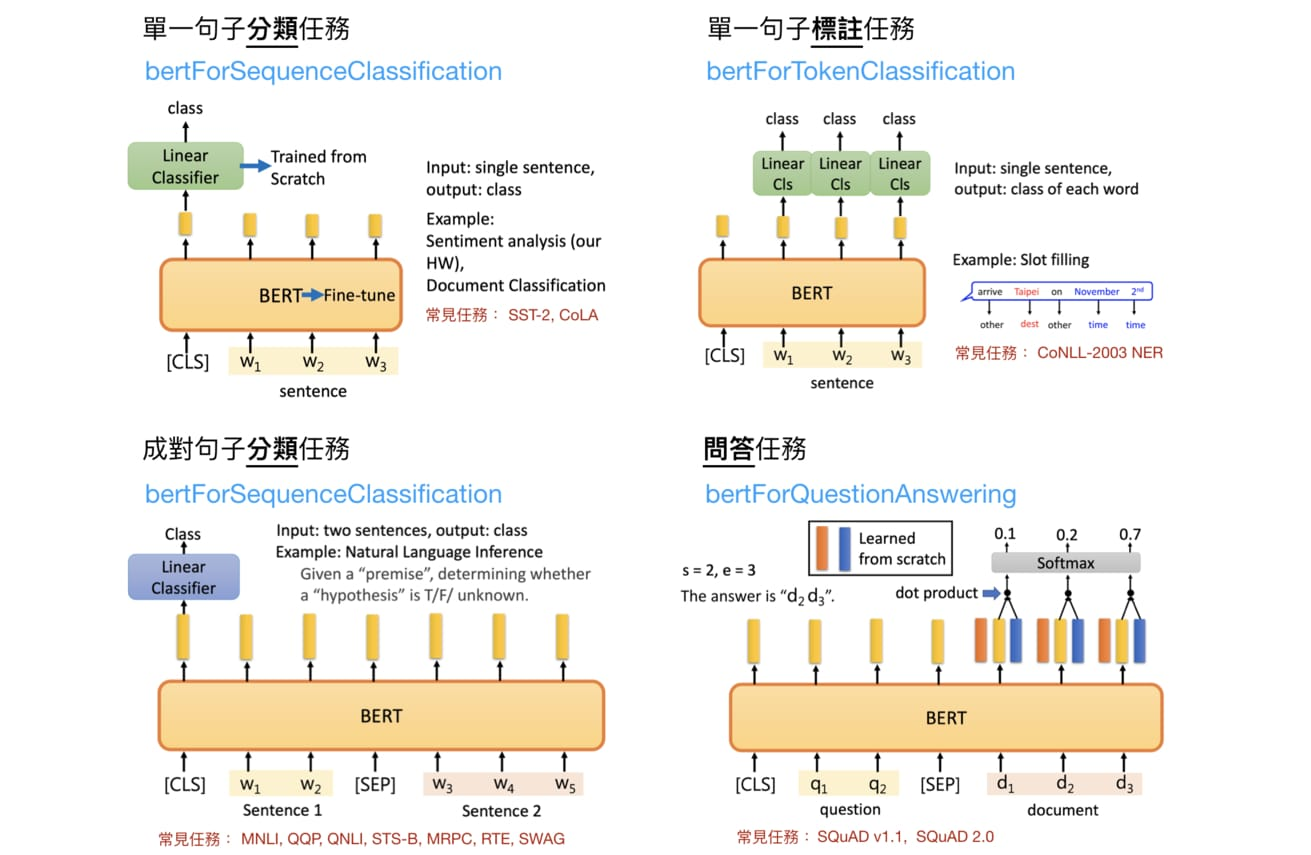

In [47]:
from transformers import BertForSequenceClassification

In [48]:
# Load a model that can do Chinese multi-classification task, n_class = 3

PRETRAINED_MODEL_NAME = "bert-base-chinese"
NUM_LABELS = 3

model = BertForSequenceClassification.from_pretrained(
    PRETRAINED_MODEL_NAME, num_labels=NUM_LABELS)

Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [49]:
clear_output()

# modules
print("""
name            module
----------------------""")
for name, module in model.named_children():
    if name == "bert":
        for n, _ in module.named_children():
            print(f"{name}:{n}")
    else:
        print("{:15} {}".format(name, module))


name            module
----------------------
bert:embeddings
bert:encoder
bert:pooler
dropout         Dropout(p=0.1, inplace=False)
classifier      Linear(in_features=768, out_features=3, bias=True)


In [50]:
model.config

BertConfig {
  "_name_or_path": "bert-base-chinese",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.18.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 21128
}

In [51]:
def get_predictions(model, dataloader, compute_acc=False):
    predictions = None
    correct = 0
    total = 0
      
    with torch.no_grad():
        for data in dataloader:
            # 將所有 tensors 移到 GPU 上
            if next(model.parameters()).is_cuda:
                data = [t.to("cuda:0") for t in data if t is not None]
            
            
            # 別忘記前 3 個 tensors 分別為 tokens, segments 以及 masks
            # 且強烈建議在將這些 tensors 丟入 `model` 時指定對應的參數名稱
            tokens_tensors, segments_tensors, masks_tensors = data[:3]
            outputs = model(input_ids=tokens_tensors, 
                            token_type_ids=segments_tensors, 
                            attention_mask=masks_tensors)
            
            logits = outputs[0]
            _, pred = torch.max(logits.data, 1)
            
            # 用來計算訓練集的分類準確率
            if compute_acc:
                labels = data[3]
                total += labels.size(0)
                correct += (pred == labels).sum().item()
                
            # 將當前 batch 記錄下來
            if predictions is None:
                predictions = pred
            else:
                predictions = torch.cat((predictions, pred))
    
    if compute_acc:
        acc = correct / total
        return predictions, acc
    return predictions
    
# 讓模型跑在 GPU 上並取得訓練集的分類準確率
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device:", device)
model = model.to(device)

_, acc = get_predictions(model, trainloader, compute_acc=True)
print("classification acc:", acc)

device: cuda:0
classification acc: 0.6241061347384268


In [52]:
def get_learnable_params(module):
    return [p for p in module.parameters() if p.requires_grad]
     
model_params = get_learnable_params(model)
clf_params = get_learnable_params(model.classifier)

print(f"""
The amount of parameters of the entire classification model：{sum(p.numel() for p in model_params)}
The amount of parameters for the linear classifier：{sum(p.numel() for p in clf_params)}
""")


The amount of parameters of the entire classification model：102269955
The amount of parameters for the linear classifier：2307



In [53]:
list(model.named_parameters())


[('bert.embeddings.word_embeddings.weight',
  Parameter containing:
  tensor([[ 0.0262,  0.0109, -0.0187,  ...,  0.0903,  0.0028,  0.0064],
          [ 0.0021,  0.0216,  0.0011,  ...,  0.0809,  0.0018,  0.0249],
          [ 0.0147,  0.0005,  0.0028,  ...,  0.0836,  0.0121,  0.0282],
          ...,
          [ 0.0346,  0.0021,  0.0085,  ...,  0.0085,  0.0337,  0.0099],
          [ 0.0541,  0.0289,  0.0263,  ...,  0.0526,  0.0651,  0.0353],
          [ 0.0200,  0.0023, -0.0089,  ...,  0.0799, -0.0562,  0.0247]],
         device='cuda:0', requires_grad=True)),
 ('bert.embeddings.position_embeddings.weight',
  Parameter containing:
  tensor([[-0.0011,  0.0083, -0.0123,  ..., -0.0281, -0.0158, -0.0110],
          [-0.0063,  0.0018, -0.0067,  ..., -0.0717, -0.0118,  0.0171],
          [ 0.0069,  0.0052, -0.0182,  ..., -0.0569,  0.0204,  0.0215],
          ...,
          [-0.0159,  0.0280,  0.0170,  ..., -0.0386,  0.0075, -0.0058],
          [-0.0059,  0.0373, -0.0192,  ..., -0.0162, -0.0231,

In [54]:
from pytorch_pretrained_bert.optimization import BertAdam

In [55]:
len(trainset)

10628

In [56]:
%%time

# train mode
model.train()


EPOCHS = 10  # 6

# Adam Optim
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)

param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']

# https://mccormickml.com/2019/07/22/BERT-fine-tuning/
# https://www.kaggle.com/competitions/fake-news-pair-classification-challenge/code?competitionId=11727
# https://www.kaggle.com/code/bbqlp33/bert-huggingface-pytorch-pretrained-bert
# num_train_optimization_steps = int(len(train_examples) / train_batch_size / gradient_accumulation_steps) * num_train_epochs
num_train_optimization_steps = int(len(trainset) / TRAIN_BATCH_SIZE / 1) * EPOCHS

optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
    ]

optimizer = BertAdam(optimizer_grouped_parameters,
                             lr=1e-5,
                             warmup=0.1,
                             t_total=num_train_optimization_steps) # BertAdam


training_loss = []
training_acc = []

val_loss = []
val_acc = []



for epoch in range(EPOCHS):
    
    running_loss = 0.0
    for data in trainloader:
        
        tokens_tensors, segments_tensors, \
        masks_tensors, labels = [t.to(device) for t in data]

        # gradient reset to zero
        optimizer.zero_grad()
        
        # forward pass
        outputs = model(input_ids=tokens_tensors, 
                        token_type_ids=segments_tensors, 
                        attention_mask=masks_tensors, 
                        labels=labels)

        loss = outputs[0]
        # backward
        loss.backward()
        optimizer.step()
        

        # batch loss
        running_loss += loss.item()
        
    # acc
    _, acc = get_predictions(model, trainloader, compute_acc=True)
    
    training_loss.append(running_loss/len(trainloader))
    training_acc.append(acc)
    
    
    print('[epoch %d] training_loss: %.3f, training_acc: %.3f' %
          (epoch + 1, running_loss/len(trainloader), acc))
    
    #####################################################################
    
    running_loss = 0.0
    for data in valloader:
        
        tokens_tensors, segments_tensors, \
        masks_tensors, labels = [t.to(device) for t in data]

        # gradient reset to zero
        optimizer.zero_grad()
        
        # forward pass
        outputs = model(input_ids=tokens_tensors, 
                        token_type_ids=segments_tensors, 
                        attention_mask=masks_tensors, 
                        labels=labels)

        loss = outputs[0]
        # backward
        # loss.backward()
        # optimizer.step()


        # batch loss
        running_loss += loss.item()
        
        
    # acc
    _, acc = get_predictions(model, trainloader, compute_acc=True)
    
    val_loss.append(running_loss/len(valloader))
    val_acc.append(acc)
    
    
    print('          val_loss: %.3f, val_acc: %.3f' %
          (running_loss/len(valloader), acc))
    
    print("----------------------------------------------------")
    

/home/bakerchen/.conda/envs/ML_training/lib/python3.7/site-packages/pytorch_pretrained_bert/optimization.py:275: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484801627/work/torch/csrc/utils/python_arg_parser.cpp:1174.)
  next_m.mul_(beta1).add_(1 - beta1, grad)


[epoch 1] training_loss: 0.459, training_acc: 0.883
          val_loss: 0.354, val_acc: 0.884
----------------------------------------------------
[epoch 2] training_loss: 0.258, training_acc: 0.949
          val_loss: 0.355, val_acc: 0.946
----------------------------------------------------
[epoch 3] training_loss: 0.144, training_acc: 0.972
          val_loss: 0.443, val_acc: 0.971
----------------------------------------------------
[epoch 4] training_loss: 0.085, training_acc: 0.985
          val_loss: 0.505, val_acc: 0.985
----------------------------------------------------
[epoch 5] training_loss: 0.048, training_acc: 0.990
          val_loss: 0.567, val_acc: 0.991
----------------------------------------------------
[epoch 6] training_loss: 0.035, training_acc: 0.993
          val_loss: 0.609, val_acc: 0.993
----------------------------------------------------
[epoch 7] training_loss: 0.020, training_acc: 0.997
          val_loss: 0.639, val_acc: 0.996
------------------------

Training beyond specified 't_total'. Learning rate multiplier set to 0.0. Please set 't_total' of WarmupLinearSchedule correctly.
Training beyond specified 't_total'. Learning rate multiplier set to 0.0. Please set 't_total' of WarmupLinearSchedule correctly.
Training beyond specified 't_total'. Learning rate multiplier set to 0.0. Please set 't_total' of WarmupLinearSchedule correctly.
Training beyond specified 't_total'. Learning rate multiplier set to 0.0. Please set 't_total' of WarmupLinearSchedule correctly.
Training beyond specified 't_total'. Learning rate multiplier set to 0.0. Please set 't_total' of WarmupLinearSchedule correctly.
Training beyond specified 't_total'. Learning rate multiplier set to 0.0. Please set 't_total' of WarmupLinearSchedule correctly.
Training beyond specified 't_total'. Learning rate multiplier set to 0.0. Please set 't_total' of WarmupLinearSchedule correctly.
Training beyond specified 't_total'. Learning rate multiplier set to 0.0. Please set 't_to

[epoch 10] training_loss: 0.008, training_acc: 0.998
          val_loss: 0.675, val_acc: 0.998
----------------------------------------------------
CPU times: user 13min 39s, sys: 15.3 s, total: 13min 55s
Wall time: 13min 55s


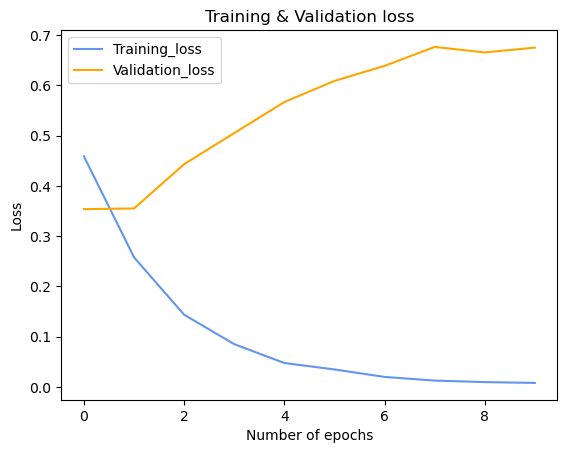

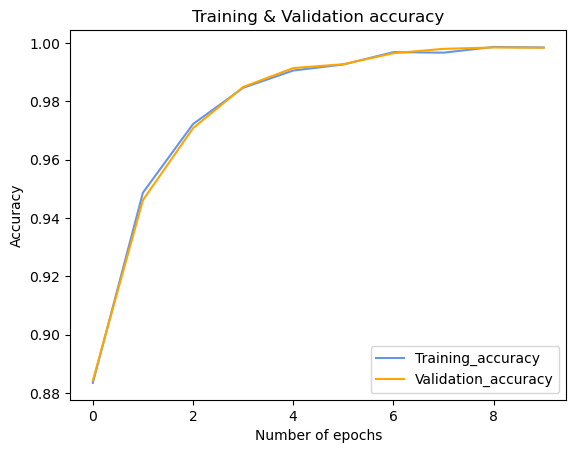

In [63]:
# visualization
plt.plot(training_loss, color='cornflowerblue', label='Training_loss')
plt.plot(val_loss, color='orange', label='Validation_loss')
plt.title('Training & Validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(training_acc, color='cornflowerblue', label='Training_accuracy')
plt.plot(val_acc, color='orange', label='Validation_accuracy')
plt.title('Training & Validation accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [58]:
%%time

TEST_BATCH_SIZE = 256

# 建立測試集。這邊我們可以用跟訓練時不同的 batch_size，看你 GPU 多大
testset = FakeNewsDataset("test", tokenizer=tokenizer)
testloader = DataLoader(testset, batch_size=TEST_BATCH_SIZE, 
                        collate_fn=create_mini_batch)

# 用分類模型預測測試集
predictions = get_predictions(model, testloader)

# 用來將預測的 label id 轉回 label 文字
index_map = {v: k for k, v in testset.label_map.items()}

# 生成 Kaggle 繳交檔案
df = pd.DataFrame({"Category": predictions.tolist()})
df['Category'] = df.Category.apply(lambda x: index_map[x])
df_pred = pd.concat([testset.df.loc[:, ["Id"]], 
                          df.loc[:, 'Category']], axis=1)
df_pred.to_csv('bert_1_prec_training_samples.csv', index=False)
df_pred.head()

CPU times: user 1min 21s, sys: 364 ms, total: 1min 21s
Wall time: 1min 10s


,Id,Category
0,321187,unrelated
1,321190,unrelated
2,321189,unrelated
3,321193,unrelated
4,321191,unrelated


In [59]:
!ls bert*.csv

bert_1_prec_training_samples.csv


In [61]:
predictions = get_predictions(model, trainloader)
df = pd.DataFrame({"predicted": predictions.tolist()})
df['predicted'] = df.predicted.apply(lambda x: index_map[x])
df1 = pd.concat([trainset.df, df.loc[:, 'predicted']], axis=1)
disagreed_tp = ((df1.label == 'disagreed') & \
                (df1.label == df1.predicted) & \
                (df1.text_a.apply(lambda x: True if len(x) < 10 else False)))
df1[disagreed_tp].head()

,text_a,text_b,label,predicted
1298,李天一已被安排出国,网上谣传李天一已出狱，北京监狱官微发文辟谣！,disagreed,disagreed
1353,李天一已被安排出国,官方辟谣，李天一仍在监狱服刑，造谣传谣会受到法律制裁,disagreed,disagreed
1397,币安买岛“建国”,币安买岛“建国”纯属谣言，但交易所们找到了新“希望之地”,disagreed,disagreed
1406,不吃主食减肥危害大,辟谣：晚饭不吃主食能减肥？不吃主食容易诱发糖尿病？,disagreed,disagreed
1989,产后不能刷牙,月子期间不能刷牙？有多少妈妈被这谣言给坑了！,disagreed,disagreed


In [ ]:
# https://leemeng.tw/attack_on_bert_transfer_learning_in_nlp.html